In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
mu = 0 
sigma = 1

In [7]:
x = np.linspace(mu- 4*sigma, mu + 4*sigma, 1000)

In [8]:
y = norm.pdf(x, mu, sigma)

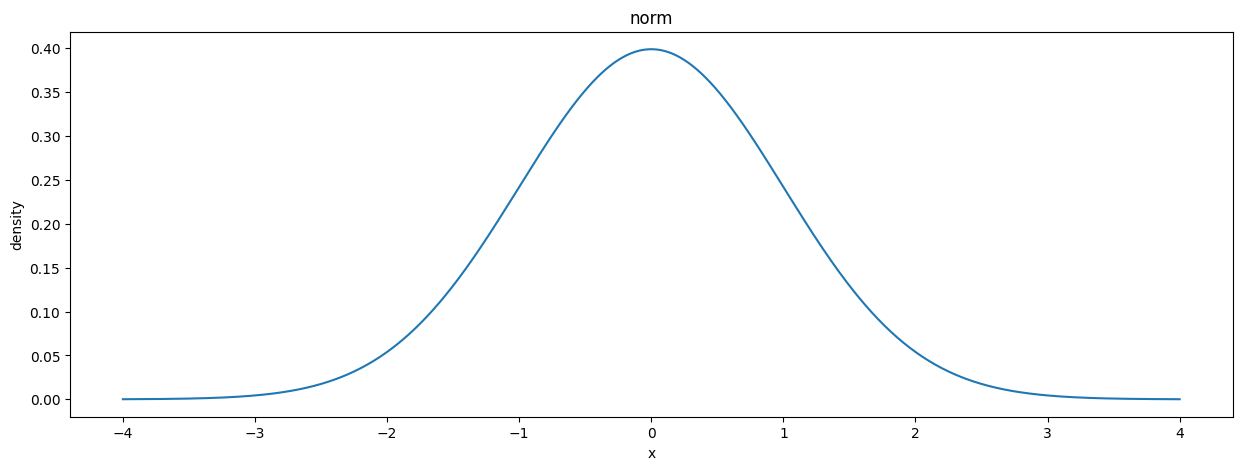

In [15]:
plt.figure(figsize=(15,5))
plt.title("norm")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(x, y)
plt.show()

In [28]:
import requests  
import pandas as pd 
import io 
hana = "https://www.kebhana.com/cms/rate/wpfxd651_01i_01.do"
payload ={"ajax" : "true",
            "curCd" : "",
            # "tmpInqStrDt" : "2025-06-02",
            "pbldDvCd" : "0",
            "pbldSqn" : "",
            "hid_key_data" : "",
            "inqStrDt" : "20250605",
            "inqKindCd" : "1",
            "hid_enc_data" : "",
            "requestTarget" : "searchContentDiv",}

exchange = pd.read_html(io.StringIO(requests.post(hana, data=payload).text))[0]



In [30]:
exchange.columns = ["_".join(set([x,y,z])) for x, y, z in exchange.columns]

In [40]:
type_ = "sell"
if type_ == "buy":
    print(exchange.loc[exchange['통화'].str.find("USD") > -1, '현찰_사실 때_환율' ])
elif type_== 'sell':
    print(exchange.loc[exchange['통화'].str.find("USD") > -1, '현찰_파실 때_환율' ])

0    1338.86
Name: 현찰_파실 때_환율, dtype: float64


In [44]:
type_ = "buy"
exchange.loc[exchange['통화'].str.find("USD") > -1, '현찰_사실 때_환율' if type_ == "buy" else '현찰_파실 때_환율' ].values[0]


np.float64(1386.54)

In [ ]:
def get_exchage(exchange='USD', date_=None, type_='buy'):
    hana = "https://www.kebhana.com/cms/rate/wpfxd651_01i_01.do"
    payload ={"ajax" : "true",
                "curCd" : "",
                "pbldDvCd" : "0",
                "pbldSqn" : "",
                "hid_key_data" : "",
                "inqKindCd" : "1",
                "hid_enc_data" : "",
                "requestTarget" : "searchContentDiv",}
    payload['inqStrDt'] = date_.replace("-", "")
    exchange_df = pd.read_html(io.StringIO(requests.post(hana, data=payload).text))[0]
    exchange_df.columns = ["_".join(set([x,y,z])) for x, y, z in exchange_df.columns]
    return exchange_df.loc[exchange_df['통화'].str.find(exchange.upper()) > -1, '현찰_사실 때_환율' if type_ == "buy" else '현찰_파실 때_환율' ].values[0]

In [52]:
get_exchage('usd', '2025-06-11', 'buy')

np.float64(1394.48)

In [ ]:
header = {'user-agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/137.0.0.0 Safari/537.36"}
naver = "https://finance.naver.com/item/sise_day.naver?code=025980&page={}"
df = pd.concat([pd.read_html(io.StringIO(requests.get(naver.format(x),headers=header).text))[0].dropna() for x in range(1,11)])

In [65]:
total = []
for x in range(1,11):
    tmp = pd.read_html(io.StringIO(requests.get(naver.format(x),headers=header).text))[0].dropna()
    total.append(tmp)
df = pd.concat(total)

In [ ]:
from datetime import date, datetime 
datetime.strptime('20250523', '%Y%m%d')

ValueError: time data '202505-23' does not match format '%Y%m%d'

In [75]:
from datetime import date, datetime 
def get_exchage(exchange='USD', date_=None, type_='buy'):
    """  
        exchange는 환율 코드 입력 -> 예) USD 
        date_ -> 날짜 형식 20250525 
        type_ -> buy, sell
    """
    try:
        datetime.strptime(date_, '%Y%m%d')
    except:
        print("날짜 형식을 지켜주세요")
        return 
    hana = "https://www.kebhana.com/cms/rate/wpfxd651_01i_01.do"
    payload ={"ajax" : "true",
                "curCd" : "",
                "pbldDvCd" : "0",
                "pbldSqn" : "",
                "hid_key_data" : "",
                "inqKindCd" : "1",
                "hid_enc_data" : "",
                "requestTarget" : "searchContentDiv",}
    payload['inqStrDt'] = date_.replace("-", "")
    exchange_df = pd.read_html(io.StringIO(requests.post(hana, data=payload).text))[0]
    exchange_df.columns = ["_".join(set([x,y,z])) for x, y, z in exchange_df.columns]
    return exchange_df.loc[exchange_df['통화'].str.find(exchange.upper()) > -1, '현찰_사실 때_환율' if type_ == "buy" else '현찰_파실 때_환율' ].values[0]

In [69]:
help(get_exchage)

Help on function get_exchage in module __main__:

get_exchage(exchange='USD', date_=None, type_='buy')
    exchange는 환율 코드 입력 -> 예) USD
    date_ -> 날짜 형식 20250525
    type_ -> buy, sell



In [76]:
get_exchage('usd', '2025/06/11', 'buy')

날짜 형식을 지켜주세요


In [77]:
pip install sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [sqlalchemy]3 [sqlalchemy]
Note: you may need to restart the kernel to use updated packages.


In [84]:
import sqlalchemy

user= 'play'
password = '123'
host='192.168.0.22'
port = 3306
database='sk17'
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

In [ ]:
exchange_df.to_sql('exchange', if_exists='', con=engine)

58

In [89]:
kbo = pd.read_sql_query("select * from kbo_player", con=engine)

In [ ]:
from bs4 import BeautifulSoup as BS 
kbo_detail_url = "https://www.koreabaseball.com/Record/Player/PitcherDetail/Basic.aspx?playerId=55146"

In [97]:
bs = BS(requests.get(kbo_detail_url).text).find("div", {'class' : 'player_info'})

In [100]:
bs.find('h4', {'id' : 'h4Team'}).text

'LG 트윈스'

In [113]:
total = []
tmp = {}
for x in bs.find_all('li')[:10]:
    a, b = list(map(str.strip, x.text.split(":")))
    tmp[a] = b
    tmp['team'] = bs.find('h4', {'id' : 'h4Team'}).text

In [116]:
pd.DataFrame([tmp])

,선수명,team,등번호,생년월일,포지션,신장/체중,경력,입단 계약금,연봉,지명순위,입단년도
0,치리노스,LG 트윈스,No.46,1993년 12월 26일,투수(우투우타),188cm/102kg,베네수엘라 U.E.N heroes nigales(고),200000달러,800000달러,25 LG 자유선발,25LG


In [120]:
from tqdm import tqdm
kbo_detail_url = "https://www.koreabaseball.com/Record/Player/PitcherDetail/Basic.aspx?playerId={}"
total = []
for id_ in tqdm(kbo['kbo_id']):
    bs = BS(requests.get(kbo_detail_url.format(id_)).text).find("div", {'class' : 'player_info'})
    tmp = {}
    for x in bs.find_all('li')[:10]:
        a, b = list(map(str.strip, x.text.split(":")))
        tmp[a] = b
        tmp['team'] = bs.find('h4', {'id' : 'h4Team'}).text
    total.append(tmp)

100%|██████████| 893/893 [03:04<00:00,  4.84it/s]


In [122]:
pd.DataFrame(total).to_sql("kbo_detail", if_exists='replace', con=engine)

893

In [124]:
kbo_detail_df = pd.read_sql_table("kbo_detail", con=engine)

In [125]:
kbo_detail_df

,index,선수명,team,등번호,생년월일,포지션,신장/체중,경력,입단 계약금,연봉,지명순위,입단년도
0,0,강민,LG 트윈스,No.100,2001년 04월 20일,투수(우투우타),188cm/88kg,수유초-홍은중-서울고,8000만원,3000만원,20 LG 2차 4라운드 33순위,
1,1,강민균,LG 트윈스,No.117,2000년 07월 17일,내야수(우투우타),178cm/81kg,강남초-서울이수중-덕수고-홍익대,3000만원,,23 LG 11라운드 107순위,
2,2,고영웅,LG 트윈스,No.116,2004년 07월 29일,투수(좌투좌타),180cm/90kg,태전초(경기광주시리틀)-모가중-야로고BC-동원대,3000만원,3000만원,25 LG 10라운드 100순위,
3,3,곽민호,LG 트윈스,No.124,2004년 12월 23일,내야수(우투우타),184cm/90kg,역삼초-자양중-배명고,3000만원,,23 LG 10라운드 97순위,
4,4,구본혁,LG 트윈스,No.6,1997년 01월 11일,내야수(우투우타),177cm/75kg,중대초-잠신중-장충고-동국대-LG-상무,5000만원,13500만원,19 LG 2차 6라운드 55순위,19LG
...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,주승우,키움 히어로즈,No.30,2000년 01월 30일,투수(우투우타),180cm/82kg,송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,7700만원,22 키움 1차,22키움
889,889,최주환,키움 히어로즈,No.53,1988년 02월 28일,내야수(우투좌타),177cm/73kg,학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,30000만원,06 두산 2차 6라운드 46순위,06두산
890,890,카디네스,키움 히어로즈,No.4,1997년 10월 10일,외야수(우투우타),185cm/93kg,미국 California State(대)-삼성,,450000달러,24 삼성 자유선발,24삼성
891,891,푸이그,키움 히어로즈,No.,1990년 12월 07일,외야수(우투우타),188cm/108kg,쿠바 EIEFD(대)-키움,300000달러,1000000달러,22 키움 자유선발,22키움
